## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

We need some library to read the images, I've chosen the pillow library which comes with Anaconda, if you need to 

pip install Pillow

should install it for you

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [2]:
##Printing Examples
def printexamples(X, y, examples_per_class = 10, number_of_classes = 10, mult = 1.0):
    pos = 0
    data = pd.DataFrame(y, columns=["yvalue"])
    for cls in range(number_of_classes):
        this_class = data[data["yvalue"] == cls]
        idxs = this_class.sample(examples_per_class).index
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow((X[idx]*mult).reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
    plt.show()

In [3]:
filelist = glob.glob("data/*/*.png")


In [4]:
X = np.array([np.array(Image.open(fname)).flatten() for fname in filelist])

In [5]:
X.shape

(5000, 400)

In [6]:
y = np.array([int(fname.split('\\')[-2]) for fname in filelist])

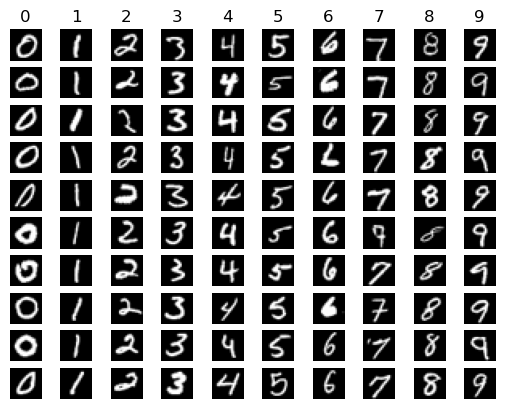

In [7]:
printexamples(X,y)

In [8]:
X = X/255.0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_temp, X_test, y_temp, y_test = train_test_split(X,y, random_state=1138, stratify=y, test_size=0.2)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, random_state=1138, stratify=y_temp, test_size=0.25)

In [ ]:
# Alternatively
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138, stratify=y, test_size=0.4)
# X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, random_state=1138, stratify=y_test, test_size=0.5)

In [13]:
X_train.shape

(3000, 400)

In [14]:
X_valid.shape

(1000, 400)

In [15]:
X_test.shape

(1000, 400)

In [16]:
from sklearn.svm import SVC

In [17]:
model_1 = SVC(kernel='linear')

In [18]:
model_1.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
model_1.score(X_valid, y_valid)

0.926

In [20]:
model_1.score(X_train, y_train)

0.998

Training score of 0.998 while validation score of 0.926 suggests overfitting

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report


In [22]:
y_pred = model_1.predict(X_valid)

In [ ]:
print(confusion_matrix(y_valid, y_pred)

In [23]:
pd.DataFrame(confusion_matrix(y_valid, y_pred), columns=range(10))

,0,1,2,3,4,5,6,7,8,9
0,97,0,1,0,0,0,1,0,1,0
1,0,100,0,0,0,0,0,0,0,0
2,0,1,93,1,1,0,1,1,2,0
3,0,0,0,90,0,5,0,1,2,2
4,0,0,1,0,95,0,1,1,0,2
5,1,2,2,4,3,85,1,0,2,0
6,1,0,0,0,1,1,97,0,0,0
7,2,0,1,1,1,0,0,94,0,1
8,0,2,5,2,2,1,1,3,83,1
9,0,0,0,0,4,2,0,2,0,92


In [78]:
classification_report?

Signature:
classification_report(
    y_true,
    y_pred,
    *,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division='warn',
)
Docstring:
Build a text report showing the main classification metrics.

Read more in the :ref:`User Guide <classification_report>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_labels,), default=None
    Optional list of label indices to include in the report.

target_names : array-like of shape (n_labels,), default=None
    Optional display names matching the labels (same order).

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

digits : int, default=2
    Number of digits for formatting output floating point values.
    When ``

In [24]:
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.95      1.00      0.98       100
           2       0.90      0.93      0.92       100
           3       0.92      0.90      0.91       100
           4       0.89      0.95      0.92       100
           5       0.90      0.85      0.88       100
           6       0.95      0.97      0.96       100
           7       0.92      0.94      0.93       100
           8       0.92      0.83      0.87       100
           9       0.94      0.92      0.93       100

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [25]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [29]:
grid_model_1 = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid, verbose=2)
# You do not need verbose=2, I only have it here to see the below
# You can set n_jobs=-1 to make it run faster

In [30]:
grid_model_1.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................................C=0.0001; total time=   0.6s
[CV] END ...........................................C=0.0001; total time=   0.6s
[CV] END ...........................................C=0.0001; total time=   0.6s
[CV] END ...........................................C=0.0001; total time=   0.6s
[CV] END ...........................................C=0.0001; total time=   0.6s
[CV] END ............................................C=0.001; total time=   0.4s
[CV] END ............................................C=0.001; total time=   0.4s
[CV] END ............................................C=0.001; total time=   0.4s
[CV] END ............................................C=0.001; total time=   0.4s
[CV] END ............................................C=0.001; total time=   0.4s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END ........................................

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             verbose=2)

In [31]:
grid_model_1.best_score_

0.9286666666666668

In [32]:
grid_model_1.best_params_

{'C': 0.1}

In [ ]:
#model_svc = SVC(kernel='linear', C=0.1)
#model_svc.fit(X_train, y_train)

In [ ]:
bestgrid = grid_model_1.best_estimator_

In [33]:
grid_model_1.score(X_valid, y_valid)

0.933

In [34]:
grid_model_1.score(X_train, y_train)

0.969

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model_2 = RandomForestClassifier()

In [38]:
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
model_2.score(X_train, y_train)

1.0

In [40]:
model_2.score(X_valid, y_valid)

0.94

In [43]:
param_grid = {'n_estimators' : [20, 50, 100, 500, 1000], 'max_depth' : [5, 10, 20, 50, 100]}
model = RandomForestClassifier(random_state=1138)
grid_model_2 = GridSearchCV(model, param_grid= param_grid, verbose=2)

In [44]:
grid_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .......................max_depth=5, n_estimators=20; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=20; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=20; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=20; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=20; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_e

GridSearchCV(estimator=RandomForestClassifier(random_state=1138),
             param_grid={'max_depth': [5, 10, 20, 50, 100],
                         'n_estimators': [20, 50, 100, 500, 1000]},
             verbose=2)

In [45]:
grid_model_2.best_score_

0.943

In [46]:
grid_model_2.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [47]:
grid_model_2.score(X_train, y_train)

1.0

In [48]:
grid_model_2.score(X_valid, y_valid)

0.94

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model_3 = KNeighborsClassifier(n_neighbors=5)

In [51]:
model_3.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
model_3.score(X_train, y_train)

0.9626666666666667

In [53]:
model_3.score(X_valid, y_valid)

0.946

In [54]:
param_grid = {'n_neighbors' : range(1, 30)}

In [55]:
model = KNeighborsClassifier()
grid_knn = GridSearchCV(model, param_grid = param_grid, verbose=2)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, verbose=2)

In [56]:
grid_knn.best_score_

0.938

In [57]:
grid_knn.best_params_

{'n_neighbors': 4}

In [58]:
grid_knn.score(X_train, y_train)

0.9636666666666667

In [59]:
grid_knn.score(X_valid, y_valid)

0.943

In [60]:
from sklearn.linear_model import LogisticRegression
model_4 = LogisticRegression(max_iter=2000)
model_4.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [61]:
model_4.score(X_train, y_train)

0.9733333333333334

In [62]:
model_4.score(X_valid, y_valid)

0.905

In [63]:
Cs

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [64]:
param_grid = {'C': Cs}

In [65]:
model = LogisticRegression(max_iter=3000)
grid_logres = GridSearchCV(model, param_grid = param_grid, verbose=2)

In [66]:
grid_logres.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             verbose=2)

In [67]:
grid_logres.best_score_

0.9103333333333333

In [68]:
grid_logres.best_params_

{'C': 1}

In [69]:
grid_logres.score(X_train,y_train)

0.9733333333333334

In [70]:
grid_logres.score(X_valid, y_valid)

0.905

Best validation score is kNN with 4 neighbours

In [71]:
X_trainvalid = np.vstack((X_train, X_valid))

In [72]:
y_trainvalid = np.hstack((y_train, y_valid))

In [80]:
best_model = KNeighborsClassifier(n_neighbors=4)
best_model.fit(X_trainvalid, y_trainvalid)

KNeighborsClassifier(n_neighbors=4)

In [81]:
best_model.score(X_test, y_test)

0.926

In [82]:
y_pred = best_model.predict(X_test)

In [83]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=range(10))

,0,1,2,3,4,5,6,7,8,9
0,96,1,0,0,0,1,1,0,1,0
1,0,99,0,0,0,0,0,0,0,1
2,1,3,90,0,0,0,1,2,3,0
3,0,0,2,89,0,2,1,2,3,1
4,0,1,0,0,91,0,1,0,0,7
5,0,0,1,2,1,93,2,0,0,1
6,1,1,0,0,0,1,97,0,0,0
7,1,1,1,0,2,0,0,93,0,2
8,1,1,2,2,1,1,1,0,87,4
9,0,0,0,1,5,0,0,3,0,91


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.93      0.99      0.96       100
           2       0.94      0.90      0.92       100
           3       0.95      0.89      0.92       100
           4       0.91      0.91      0.91       100
           5       0.95      0.93      0.94       100
           6       0.93      0.97      0.95       100
           7       0.93      0.93      0.93       100
           8       0.93      0.87      0.90       100
           9       0.85      0.91      0.88       100

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

